# Workshop 5: Deterministic Analysis (notebook 2 of 2)



In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import openturns as ot
ot.Log.Show(ot.Log.NONE)

import Probabilistic

## Task 1: Set up deterministic calculation

Everything needed to describe stress in the tunnels is included in the `*.py` files that are imported below. See notebook `Analysis_deterministic.ipynb` for additional information.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:3px 20px; color: black; border-radius: 10px; width: 95%">
<p>
<b>Task 1:</b>
confirm that the Python modules can be imported successfully.
</p>
</div>

In [86]:
import FEM
import Morrisson_forces

## Task 2: Determine statistical properties of Random Variables


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:3px 20px; color: black; border-radius: 10px; width: 95%">
<p>
<b>Task 2.1:</b>
define the marginal distributions using OpenTURNs (the tuple containing the random variables and their descriptions is already provided).
</p>
</div>

In [87]:
X1 = ot.Exponential(2.6) #Swell
X2 = ot.Exponential(1.3) #Wind waves
X3 = ot.Normal(1.5, 0.5) #Current speed
X4 = ot.Normal(0.4, 0.05)
X5 = ot.Normal(0.2, 0.05)
X6 = ot.Normal(2350, 200)


X = (X1, X2, X3, X4, X5, X6)
descriptions = ["windsea","swell", "u_current", "Friction_anchor", "Friction_chain", "Mass_density_concrete"]
#descriptions = ["windsea","swell", "u_current", "Friction_anchor"]

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:3px 20px; color: black; border-radius: 10px; width: 95%">
<p>
<b>Task 2.2:</b>
visualize each of the random variables to confirm that they are implemented correctly, and that you get a sense for their magnitude and distribution.
</p>
</div>

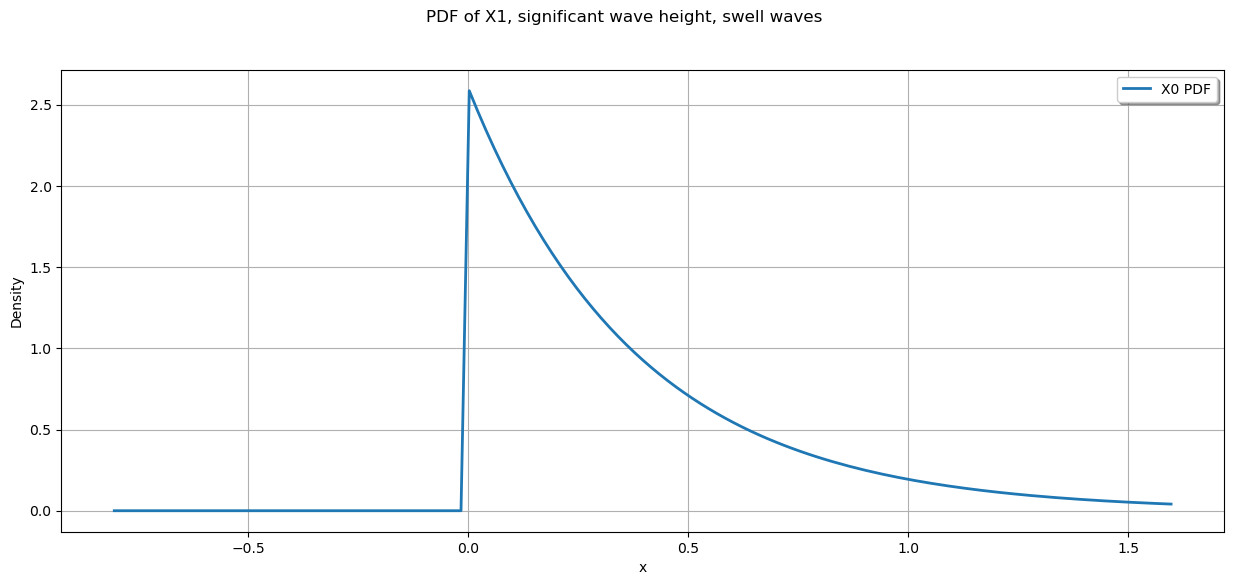

In [88]:
X1_pdf = X1.drawPDF()
graph = X1.drawPDF()
graph.setTitle("PDF of X1, significant wave height, swell waves")
graph.setXTitle("x")
graph.setYTitle("Density")
view = ot.viewer.View(graph)
plt.show()

## Task 3: Determine the Limit State Function

To keep things easy to follow, we will divide this into two parts:
1. write a function to calculate the total axial: `total_calculation_axial_stresses`
2. write a function to represent the vectorized LSF, as in WS04: `myLSF`

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:3px 20px; color: black; border-radius: 10px; width: 95%">
<p>
<b>Task 3.1:</b>
complete the function as done in notebook <code>Analysis_deterministic.ipynb</code> to evaluate the axial stress.
</p>
</div>

In [89]:
def Mooring_forces(significant_wave_height_swell,
                                     significant_wave_height_windsea,
                                     U_current_velocity):
    '''Find axial stresses due to wind and swell waves.
    
    Inputs: three load random variables
    Returns: stress
    '''

    SOL= FEM.inv_catenary_end_xz(Morrisson_forces.F_morison_wind(significant_wave_height_swell,
                                     U_current_velocity, significant_wave_height_windsea))

    HEnd = SOL[0] #N
    L_bottom = 1200 - SOL[1] #m

    

    

    return HEnd, L_bottom
    # Note: you do not need to include the `time` tracking here.

In [90]:
SOL = FEM.inv_catenary_end_xz(Morrisson_forces.F_morison_wind(2.6,
                                     1.3,
                                       1.3))

print(SOL)

10.800373990838446
(497436.48862964055, 620.6079222750893)


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:3px 20px; color: black; border-radius: 10px; width: 95%">
<p>
<b>Task 3.2:</b>
based on the definition of failure provided above, and your understanding of the stress calculation algorithm (notebook <code>Analysis_deterministic.ipynb</code>), definte the limit-state function. Remember to vectorize the function.
</p>
</div>

In [91]:
def myLSF(X):
    ''' 
    Vectorized limit-state function.

    Inputs: x (array of random variables)
    Output: limit-state function value


    '''

    significant_wave_height_swell= X[0]
    significant_wave_height_windsea= X[1]
    U_current_velocity = X[2]
    Friction_anchor = X[3]
    Friction_chain = X[4]
    Concrete_density = X[5]
    
    

    HEnd, L_susp = Mooring_forces(significant_wave_height_swell,
                                     significant_wave_height_windsea,
                                     U_current_velocity)

    V = 4*4*3  #m^3
    g = 9.81 #N/kg
    rho_chain = 300 #kg/m
    L_bottom = 1200 - L_susp #m

    LSF_var = Concrete_density*V*g*Friction_anchor + rho_chain * L_bottom * g * Friction_chain -  HEnd

    


    return [LSF_var]




<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:3px 20px; color: black; border-radius: 10px; width: 95%">
<p>
<b>Task 3.3:</b>
we need to define failure for OpenTURNs. Use the cell below to define the failure criteria for use in OpenTURN's.
<br><br>
<em>Hint: look at the inputs for function <code>input_OpenTurns</code>, which is defined inside the file <code>Probabilistic.py</code>. Executing the code cell below will print out the docstring.</em>
</p>
</div>

In [92]:
failure_treshold = 0



## Task 4: Run Monte Carlo Simulation and FORM analysis

Most of the work has been done for you inside the file `Probabilistic.py`. It reuses the same code for using OpenTURNs that you saw previously in WS03 and WS04.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:3px 20px; color: black; border-radius: 10px; width: 95%">
<p>
<b>Task 4.1:</b>
read through the functions in <code>Probabilistic.py</code> until you understand what each one does and how you can use it to solve the component reliability problem. Test your understanding by taking turns explaining the contents to your fellow group members.
</p>
</div>

You now have everything you need to complete the component reliability problem. All you have to do is execute the right code, interpret the results, then write about it in `Report.md`.

Note that you will have to decide yourself how to use each method (e.g., FORM versus MCS). Note that the FEM model takes some time to run, so using a lot of simulations with MCS is probably not a good way to start.

Before you start running code, take a few minutes to review the following overview pages in the workbook:
- [Overview of FORM](https://teachbooks.github.io/HOS-workbook/2024/component/form.html)
- [Comparison of MCS and FORM](https://teachbooks.github.io/HOS-workbook/2024/component/mcs_form.html)



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:3px 20px; color: black; border-radius: 10px; width: 95%">
<p>
<b>Task 4.2:</b>
<br>Use the functions in <code>Probabilistic.py</code> to complete the MCS and FORM analysis. Because our target probability is 1%, we should run MCS for <em>at least</em> 1000 simulations. Think carefully about how long that analysis might take before you start it (for example, how long did each analysis take in the deterministic notebook?). Perhaps it is better to start with a different (faster) method?

Note that the task of setting up the reliability analysis will be <em>much</em> easier if you actually spent some time on Task 4.1 &#128540;<br><br>
<em>You are free to modify the code in <code>Probabilistic.py</code>, but it is not required in order to complete the assignment.</em>
</p>
</div>

In [93]:
Probabilistic.input_OpenTurns(X, ["X1", "X2", "X3", "X4", "X5", "X6"], myLSF, failure_treshold)

In [94]:
result, x_star, u_star, pf, beta = Probabilistic.run_FORM_analysis()

3.293304260844505
3.3979602650626797
3.5187068131757773
3.306657390464935
3.293304260844505
3.293304260844505
3.293304260844505
3.320318096056794
3.3067895920247254
3.313553544050381
3.3203126437327306
3.32706570732588
3.3338062406650217
3.340527413382698
3.347221948218087
3.353881911134755
3.360498406818116
3.367061116865955
3.3735575569554404
3.3799717905327635
3.386281980160083
3.392455093240846
3.3984331538907684
3.4040853569078164
3.4089071773487447
3.4276041544877094
3.42766924777308
3.4336265671565087
3.4390915337899917
3.4439067875333107
3.4464983791180828
3.454488427034594
3.46021173213332
3.4648315254969067
3.4512782062828418
3.4433611381848546
3.449939140444424
3.455307428962526
3.4285328333192755
3.4358166896031954
3.4428609187929213
3.449678091810334
3.456164764575498
3.4620334037995866
3.4659096694986298
3.472747053285623
3.477846165835795
3.482614266219439
3.4846823908324347
3.490824057196869
3.490902553436015
3.5006434339301125
3.505024104305847
3.5131245992757405
3.518

In [95]:
Probabilistic.importance_factors(result)

--- FORM Importance Factors (alpha) ---


Importance factors, from OpenTURNs:
   0.002
   0.016
   0.000
   0.225
   0.677
   0.080
3.3020298124140037
3.301980734601426
3.302032919996301
3.301977626856215
3.3020082935632216
3.3020022533386473
3.302005273426259
3.302005273426259
3.302005273426259
3.302005273426259
3.302005273426259
3.302005273426259

Importance factors, based on normal vector in U-space = 
   0.047
   0.128
   0.008
  -0.474
  -0.823
  -0.283
Note: this will be different from result.getImportanceFactors()
if there are resistance variables.
3.3020298124140037
3.301980734601426
3.302032919996301
3.301977626856215
3.3020082935632216
3.3020022533386473
3.302005273426259
3.302005273426259
3.302005273426259
3.302005273426259
3.302005273426259
3.302005273426259

Sensitivity of Reliability Index to Multivariate Distribution

Distribution item number: 0
  Item name: X1

Distribution item number: 1
  Item name: X2

Distribution item number: 2
  Item name: X3

Distribution item nu

(class=PointWithDescription name=Importance Factors dimension=6 description=[X1,X2,X3,X4,X5,X6] values=[0.0022178,0.0162982,7.08538e-05,0.224637,0.676954,0.0798229],
 array([ 0.04710188,  0.12764962,  0.00839187, -0.47395743, -0.82276605,
        -0.28255432]),
 [class=PointWithDescription name=X1 dimension=2 description=[lambda_marginal_0,gamma_marginal_0] values=[0.0166056,-0.136371],class=PointWithDescription name=X2 dimension=2 description=[lambda_marginal_1,gamma_marginal_1] values=[0.0984051,-0.153641],class=PointWithDescription name=X3 dimension=2 description=[mu_0_marginal_2,sigma_0_marginal_2] values=[-0.0167837,-0.00046015],class=PointWithDescription name=X4 dimension=2 description=[mu_0_marginal_3,sigma_0_marginal_3] values=[9.47915,-14.6332],class=PointWithDescription name=X5 dimension=2 description=[mu_0_marginal_4,sigma_0_marginal_4] values=[16.4553,-44.0976],class=PointWithDescription name=X6 dimension=2 description=[mu_0_marginal_5,sigma_0_marginal_5] values=[0.00141277

In [96]:
Probabilistic.run_MonteCarloSimulation(10000)

1.0126075728027397
2.3875148094148364
3.117206638361378
1.3683709891086258
0.6784298996893805
3.264851033811738
2.284246230683659
2.6425662112104344
0.4433349004268313
4.49169651873085
3.0748092697966185
1.142445192791687
1.7534563633835303
3.768003383311359
3.185083199615982
6.528271003558484
6.803034964861534
0.8908966378267777


5.2132451866456275
9.918785202184116
1.2569861752037228
4.895786740606581
14.563891105164984
3.4874971411368647
2.8067630350698485
2.1468319605414177
1.8544574293414875
3.4164441478354313
3.8766282706747592
5.571491597664475
4.081847405794013
1.2510412758042964
0.937893851071474
2.3673480444084714
7.3660211013816195
2.526867793075149
4.01835684137906
7.944217969520928
4.590660524971902
2.038358567343437
1.9190443063017408
1.6339345986845883
0.4740176197848389
1.6821251069864926
3.789621225433296
1.276357689983556
9.563138062741896
2.5428513097826144
4.3664495486705475
5.005657767414114
3.236287373292242
0.9931136088639947
0.5716642921145358
6.093930048652146
4.159481983417137
4.9717932742973865
2.3639269611360167
1.0151879398305765
2.00786024043356
0.8016339351706976
0.4457531690987039
9.754577389840199
3.8216645613902473
2.7137718882438433
4.489835431057887
3.560547963198314
1.2041005757378216
1.9568436423319013
5.472798982356363
7.328955882896191
1.9028434298404404
3.543531166903786


c:\Users\leuma\anaconda3\envs\mude\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


4.331816480190813
3.3318844676120043
3.8131781561385734
3.3665527803687993
1.4358622833772334
2.667169155812405
1.825225173464797
2.70060722767855
0.813367925654406
1.612018495910155
2.0619454389319025
1.5762853620994264
4.1787377915624635
1.9811274777747074
4.199099444187821
2.6060987038845846
7.080959272857407
1.2792603520649997
3.7841082180665824
1.6618353569552884
3.986591868780889
5.6777269414484515
1.8683794376991685
1.9729007897113489
2.1045794313670756
2.6051355850443376
3.638177126653593
4.547399903855716
2.5352847798934537
6.385397286432805
2.329689888114632
1.6215103878844597
1.130579939180225
2.2835061416573827
5.654516219521412
1.319015173120981
5.6794664990424515
2.788435485804961
4.346989548887684
1.142545803105169
3.53051334199507
1.550836468249175
1.906865350691764
1.7966273787536355
2.130831114737367
3.453790693198091
0.8029062914400671
1.6094090102465182
2.8624086363323906
2.504009544273883
5.581438576445985
10.5745228170264
4.400202619844417
5.278832891150404
1.0536

0.0015

Visualisatie reliability analysis

In [97]:
H_wind = ot.Exponential(2.6) #Swell
H_swell = ot.Exponential(1.3) #Wind waves
U = ot.Normal(1.5, 0.5) #Current speed
FR_anch = ot.Normal(0.4, 0.05)
FR_ch = ot.Normal(0.2, 0.05)
M_conc = ot.Normal(2350, 200)

descriptions = ["windsea","swell", "u_current", "Friction_anchor", "Friction_chain", "Mass_density_concrete"]


HEnd, L_susp = Mooring_forces(x_star[0], x_star[1], x_star[2])
V = 4*4*3  #m^3
g = 9.81 #N/kg
rho_chain = 300 #kg/m
L_bottom = 1200 - L_susp #m


3.302005273426259


In [98]:
def f_fr_anch(FR_ch):
    ''' Computes FR_anch given H_wind, H_swell and U, FR_ch, M_conc. '''
    return (HEnd - rho_chain * L_bottom * g * FR_ch)/(x_star[5]*V*g)


chain_sample = np.linspace(0.0, 0.30, 200)
anchor_sample = [f_fr_anch(k) for k in chain_sample]     # For now, take (Y, M2) plane
print(anchor_sample)

import matplotlib.cm as cm
mean_vector = [0.4, 0.2]

[0.43740055317266197, 0.4347835442189613, 0.43216653526526055, 0.4295495263115599, 0.42693251735785914, 0.42431550840415844, 0.42169849945045773, 0.419081490496757, 0.4164644815430564, 0.4138474725893556, 0.41123046363565496, 0.4086134546819542, 0.4059964457282535, 0.40337943677455285, 0.4007624278208521, 0.39814541886715143, 0.3955284099134507, 0.39291140095975, 0.39029439200604926, 0.38767738305234856, 0.3850603740986479, 0.38244336514494714, 0.3798263561912465, 0.37720934723754573, 0.3745923382838451, 0.3719753293301444, 0.3693583203764436, 0.3667413114227429, 0.3641243024690422, 0.36150729351534155, 0.3588902845616408, 0.35627327560794014, 0.3536562666542394, 0.3510392577005387, 0.348422248746838, 0.34580523979313726, 0.3431882308394366, 0.34057122188573585, 0.3379542129320352, 0.3353372039783345, 0.33272019502463374, 0.3301031860709331, 0.3274861771172323, 0.3248691681635317, 0.3222521592098309, 0.31963515025613026, 0.3170181413024295, 0.3144011323487288, 0.31178412339502815, 0.30

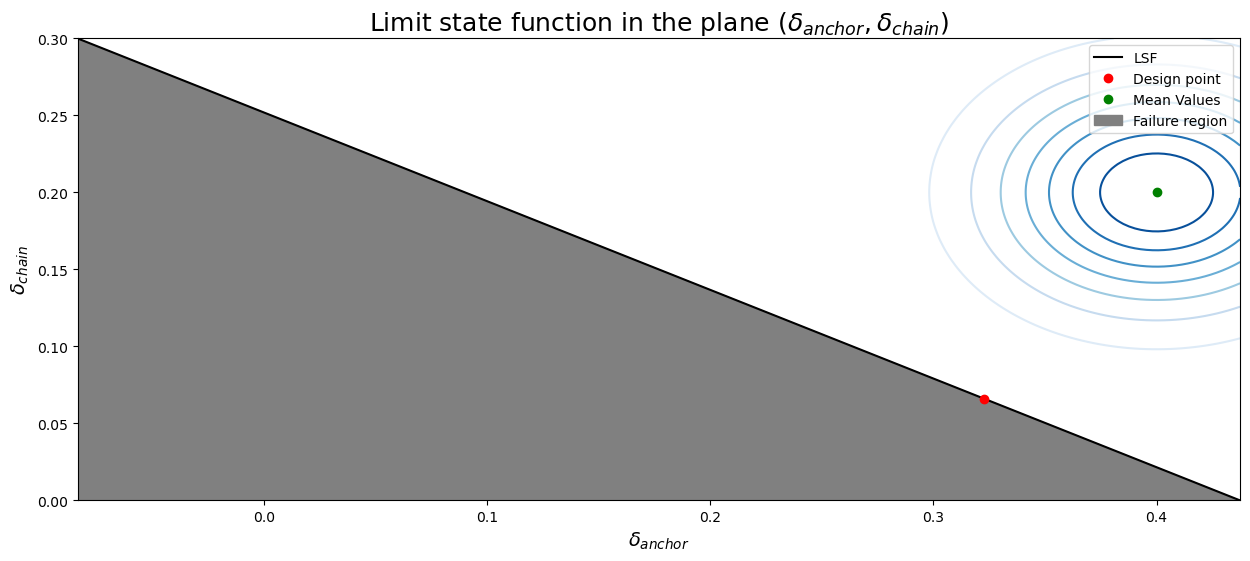

In [103]:
f, ax = plt.subplots(1)

ax.plot(anchor_sample, chain_sample, label="LSF", color="k")
# Contour plot
X_grid,Y_grid = np.meshgrid(anchor_sample,chain_sample)
pdf = np.zeros(X_grid.shape)
for i in range(X_grid.shape[0]):
    for j in range(X_grid.shape[1]):
            # This is correct, but only works when ALL RV's are independent!
            pdf[i,j] = X4.computePDF(X_grid[i,j])*X5.computePDF(Y_grid[i,j])
            #pdf[i,j] = inputDistribution.computePDF([x_star[0], X_grid[i,j], x_star[2], Y_grid[i,j]])
ax.contour(X_grid, Y_grid, pdf, levels=8, cmap=cm.Blues)

ax.set_xlabel(r"$\delta_{anchor}$", fontsize=14)
ax.set_ylabel("$\delta_{chain}$", fontsize=14)
ax.plot(x_star[3], x_star[4], 'ro', label="Design point")
ax.plot(mean_vector[0], mean_vector[1], 'go', label="Mean Values")
ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.fill_between(anchor_sample, ylim[0], chain_sample, color="grey", label="Failure region")
ax.set_title(r"Limit state function in the plane $(\delta_{anchor}, \delta_{chain})$", fontsize=18)
ax.legend();

## Task 5: Design Case

The consortium of Colomes & Agarwal Inc. and Frank & Co is still trying to decide what material to use for the tunnel: concrete or steel. They think the current concrete design is insufficient, so they have asked you to look into the matter for them. There are two options:
1. Improve the quality of the concrete production process, which reduces $\sigma$ from 5 to 1
2. Change the material to steel (distribution defined in `README.md`)

It is not immediately clear which will have a bigger impact, as the standard deviation is much higher for steel, despite the higher mean value.


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:3px 20px; color: black; border-radius: 10px; width: 95%">
<p>
<b>Task 5:</b> add a fourth variable to the reliability analysis and run a few more reliability calculations. Note that you will need to modify several Python objects:the create a new random varable <code>X4</code>, redefine the vector of random variables <code>X</code>, redefine the <code>descriptions</code> and create a new limit-state function.
</p>
</div>

In [100]:
# YOUR_CODE_HERE